In [ ]:
#hide
# !pip install -Uqq fastbook
#import fastbook
#fastbook.setup_book()


In [ ]:
#hide
from fastbook import *
from fastai.vision.all import *

from fastai.vision.widgets import *

In [ ]:
from jmd_imagescraper.core import * # dont't worry, it's designed to work with import *
from pathlib import Path

In [ ]:


root = Path().cwd()/"knifeCategory"

duckduckgo_search(root,"butterfly" , "butterfly knife uk", max_results=100)

duckduckgo_search(root,"pocket" , "pocket knife uk", max_results=100)

duckduckgo_search(root, "machete","machete uk", max_results=100)

duckduckgo_search(root, "bayonet","army bayonet knife uk", max_results=100)

duckduckgo_search(root, "kitchen","kitchen knife uk", max_results=100)

Duckduckgo search: butterfly knife uk


Duckduckgo search: pocket knife uk


Duckduckgo search: machete uk


Exception occured while retrieving https://tse2.mm.bing.net/th?id=OIP.2Udw6lPlD8iX7ppnOw_RwQHaHa&pid=Api
Duckduckgo search: army bayonet knife uk


Duckduckgo search: kitchen knife uk


[Path('/notebooks/knifeCategory/kitchen/001_4de9f3d0.jpg'),
 Path('/notebooks/knifeCategory/kitchen/002_99394bb0.jpg'),
 Path('/notebooks/knifeCategory/kitchen/003_0103f56b.jpg'),
 Path('/notebooks/knifeCategory/kitchen/004_d6fcc580.jpg'),
 Path('/notebooks/knifeCategory/kitchen/005_edb7f977.jpg'),
 Path('/notebooks/knifeCategory/kitchen/006_1fb2cf0f.jpg'),
 Path('/notebooks/knifeCategory/kitchen/007_cae302e7.jpg'),
 Path('/notebooks/knifeCategory/kitchen/008_a3388491.jpg'),
 Path('/notebooks/knifeCategory/kitchen/009_0a928b56.jpg'),
 Path('/notebooks/knifeCategory/kitchen/010_32610fb4.jpg'),
 Path('/notebooks/knifeCategory/kitchen/011_73adea2e.jpg'),
 Path('/notebooks/knifeCategory/kitchen/012_6d2815c7.jpg'),
 Path('/notebooks/knifeCategory/kitchen/013_cfa9fa49.jpg'),
 Path('/notebooks/knifeCategory/kitchen/014_3d50d733.jpg'),
 Path('/notebooks/knifeCategory/kitchen/015_5139497a.jpg'),
 Path('/notebooks/knifeCategory/kitchen/016_b6fb91ff.jpg'),
 Path('/notebooks/knifeCategory/kitchen/

In [ ]:
from jmd_imagescraper.imagecleaner import *
display_image_cleaner(root)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [ ]:
path =  root


In [ ]:
knives = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = knives.dataloaders(path)

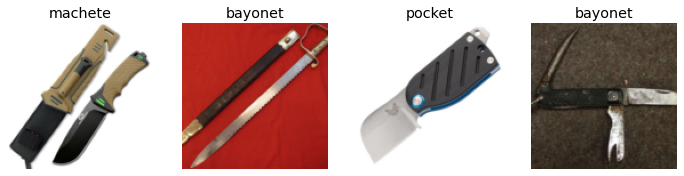

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
knives = knives.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = knives.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.398197,1.158703,0.353535,00:03


epoch,train_loss,valid_loss,error_rate,time
0,1.467714,0.920867,0.303030,00:03
1,1.200526,0.973783,0.282828,00:03
2,1.001627,1.010988,0.282828,00:03
3,0.899520,0.992466,0.292929,00:04


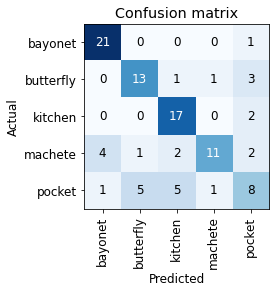

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Let's look at our "wrongest" images

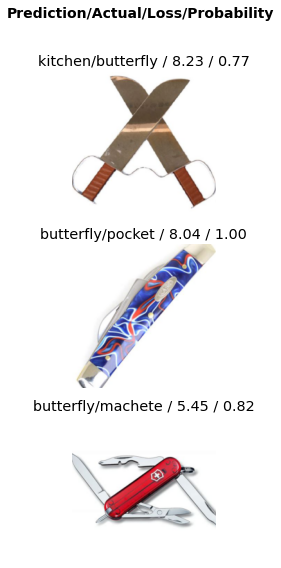

In [ ]:
interp.plot_top_losses(4, nrows=3, ncols=1)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

I've now done a fair bit of cleaning, so let's go again

In [ ]:
knives = knives.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = knives.dataloaders(path)

epoch,train_loss,valid_loss,error_rate,time
0,2.876010,1.542745,0.494118,00:03


epoch,train_loss,valid_loss,error_rate,time
0,1.497754,0.854474,0.341176,00:03
1,1.256221,0.505663,0.211765,00:03
2,1.004306,0.477453,0.188235,00:03
3,0.826303,0.486973,0.200000,00:03


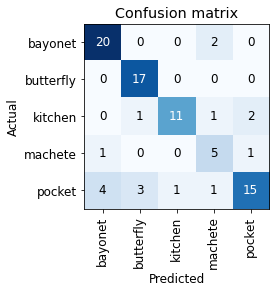

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()



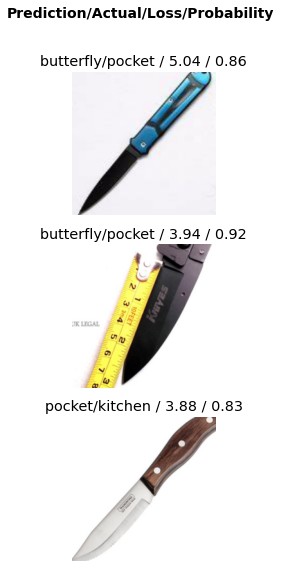

In [ ]:
interp.plot_top_losses(4, nrows=3, ncols=1)

In [ ]:
learn.export()